In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
%matplotlib inline

RANDOM_SEED = 139


In [6]:
train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

In [13]:
train_data.shape

(200, 2)

In [7]:
# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [8]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=139)

<ipython-input-12-fcd290d72ced>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')


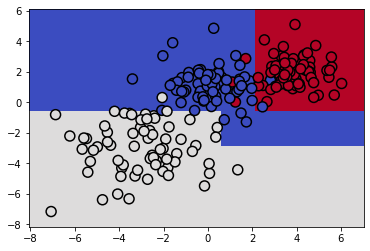

In [12]:
# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

In [17]:
df = pd.read_csv('../Data/bill_authentication.xls')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [21]:
X = df.drop('Class', axis=1).values
y = df.Class.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17, test_size=0.2)

In [23]:
clf_tree = DecisionTreeClassifier(
    max_depth=3, 
    random_state=17,
    max_features=2
)

# training the tree
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=2, random_state=17)

In [27]:
y_pred = clf_tree.predict(X_test)

In [29]:
round(f1_score(y_test, y_pred), 3)

0.866

In [31]:
X_test.shape

(275, 4)

In [39]:
print(f"Class is {clf_tree.predict(np.array([2.04378,-0.38422,1.437292,0.76421]).reshape([1, 4]))}.")

Class is [0].


## Overfitting

<ipython-input-40-0cf8541efd44>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')


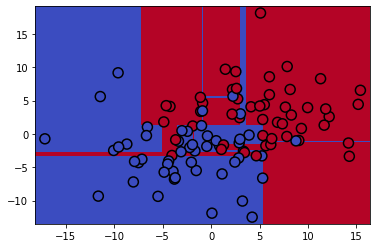

In [40]:
RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=100, centers=[(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(5,5))


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

## Regression

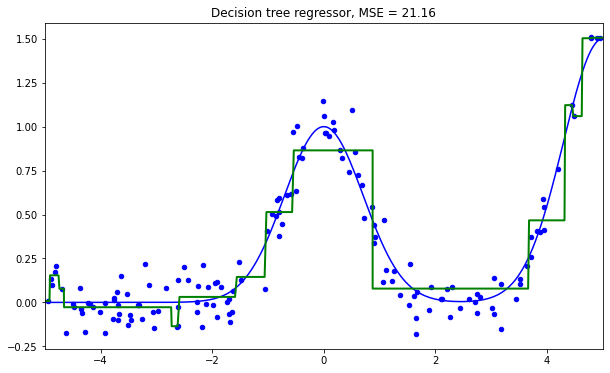

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

In [56]:
data = pd.read_csv('../Data/petrol_consumption.xls')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [57]:
X = data.drop('Petrol_Consumption', axis=1).values
y = data.Petrol_Consumption.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [58]:
reg_tree = DecisionTreeRegressor(random_state=42)

# training the tree
reg_tree.fit(X_train, y_train)
y_pred = reg_tree.predict(X_test)

round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

87.97

In [62]:
reg_tree.get_depth()

11

In [65]:
wine = pd.read_csv('../Data/winequality-red.xls', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [75]:
wine['is_good'] = wine.quality.apply(lambda x: 1 if x >= 6 else 0)

In [76]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [86]:
X = wine.drop(['quality', 'is_good'], axis=1).values
y = wine.is_good.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [88]:
log_reg = LogisticRegression(random_state=42)

# training the reg
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print(f"Decision tree f1-score: {f1_score(y_test, y_pred_log)}.")

reg_tree = DecisionTreeClassifier(random_state=42, max_depth=10)

# training the tree
reg_tree.fit(X_train, y_train)
y_pred_tree = reg_tree.predict(X_test)

print(f"Decision tree f1-score: {f1_score(y_test, y_pred_tree)}.")

Decision tree f1-score: 0.7537878787878789.
Decision tree f1-score: 0.7927927927927927.


c:\users\voytik\anaconda3\envs\ds\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
ens_trees = BaggingClassifier(random_state=42, n_estimators=1500)

# training the tree
ens_trees.fit(X_train, y_train)
y_pred_ens = ens_trees.predict(X_test)

print(f"Bagging f1-score: {f1_score(y_test, y_pred_ens)}.")

Bagging f1-score: 0.8157894736842105.


In [104]:
weather = pd.read_csv('../Data/temps_extended.xls')

y = weather['actual']
X = weather.drop(['actual','weekday','month','day','year'],axis =1)
X_train, X_val, y_train, y_val=train_test_split(X,y,test_size=0.3, random_state=42)

In [95]:
weather.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [105]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
orig_mse = mean_squared_error(y_val, y_pred)
# Look at parameters used by our current forest
print('Параметры по умолчанию:\n')
pprint(rf.get_params())

Параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [97]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [98]:
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [99]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [106]:
rf = RandomForestRegressor(random_state = 42, 
                           n_estimators = 1000, 
                           min_samples_split = 5, 
                           min_samples_leaf = 2, 
                           max_features = 'sqrt', 
                           max_depth = 10, 
                           bootstrap = True)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

changed_mse = mean_squared_error(y_val, y_pred)

In [109]:
round(orig_mse - changed_mse, 1)

1.5

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('../Data/HR-dataset.csv')

np.random.seed(42)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

target = 'left'
features = df.columns.drop(target)
features = features.drop('empid')  # Удалим идентификатор пользователя как нерепрезентативный признак
print(features)

X, y = df[features].copy(), df[target]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


In [120]:
salary_ordinals = {'low': 1, 'medium': 2, 'high': 3}

X['dept'] = X['dept'].apply(X['dept'].value_counts().get)
X['salary'] = X['salary'].apply(salary_ordinals.get)

In [121]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,4140,1
1,0.80,0.86,5,262,6,0,0,4140,2
2,0.11,0.88,7,272,4,0,0,4140,2
3,0.72,0.87,5,223,5,0,0,4140,1
4,0.37,0.52,2,159,3,0,0,4140,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,2229,1
14995,0.37,0.48,2,160,3,0,0,2229,1
14996,0.37,0.53,2,143,3,0,0,2229,1
14997,0.11,0.96,6,280,4,0,0,2229,1


In [122]:
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

In [123]:
def estimate_accuracy(clf, X, y, cv=5):
    return cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

In [126]:
tree = DecisionTreeClassifier(max_depth=30)
print("Decision tree:", estimate_accuracy(tree, X, y))

Decision tree: 0.9745982216294321


In [127]:
bagging_trees = BaggingClassifier(tree)
print("Decision tree bagging:", estimate_accuracy(bagging_trees, X, y))

Decision tree bagging: 0.9890660886962321


In [128]:
random_tree = DecisionTreeClassifier(max_features=int(np.sqrt(len(features))), max_depth=30)
print("Random tree:", estimate_accuracy(random_tree, X, y))

bagging_random_trees = BaggingClassifier(random_tree)
print("Random tree bagging:", estimate_accuracy(bagging_random_trees, X, y))

Random tree: 0.9766655996443259
Random tree bagging: 0.9900661331554963


In [129]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_features=int(np.sqrt(len(features))),
    max_depth=30,
    oob_score=True,
    n_jobs=-1
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

0.9927995199679979

In [132]:
lr = LogisticRegression(solver='saga', max_iter=200)
lr.fit(X, y)
print("LR:", estimate_accuracy(lr, X, y))

random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    max_features=0.5,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

LR: 0.7709770367900411
Bagging for LR: 0.7701104368122708
Bagging for LR: 0.7569754140268978


In [133]:
def plot_predictions(X, y, clf, proba=False, points_size=7, xlabel='x', ylabel='y'):
    """Fits the classifier on the data (X, y) and plots the result on a 2-D plane."""
    def get_grid(data):
        x_std, y_std = data.std(axis=0)
        x_min, x_max = data[:, 0].min() - x_std / 2, data[:, 0].max() + x_std / 2
        y_min, y_max = data[:, 1].min() - y_std / 2, data[:, 1].max() + y_std / 2
        return np.meshgrid(np.linspace(x_min, x_max, num=200),
                           np.linspace(y_min, y_max, num=200))
    
    clf.fit(X, y)
    xx, yy = get_grid(X)
    if proba:
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
    plt.figure(figsize=(10.0, 10.0))
    plt.pcolormesh(xx, yy, predicted, cmap=plt.cm.coolwarm, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=points_size, cmap=plt.cm.coolwarm, alpha=0.90)
    plt.ylim([yy.min(),yy.max()])
    plt.xlim([xx.min(),xx.max()])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return clf

In [135]:
from sklearn.datasets import load_digits

In [141]:
data = load_digits()
X = data['data']
y = data['target']

In [139]:
from sklearn.model_selection import cross_val_score

In [143]:
tree = DecisionTreeClassifier()

cross_val_score(tree, X, y, cv=10, n_jobs = -1).mean()

0.8252607076350094

In [144]:
tree_bag = BaggingClassifier(tree, n_estimators=100)
cross_val_score(tree_bag, X, y, cv=10, n_jobs = -1).mean()

0.921502172563625

In [153]:
tree_bag = BaggingClassifier(tree, n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
cross_val_score(tree_bag, X, y, cv=10, n_jobs = -1).mean()

0.9371260086902545

In [154]:
tree = DecisionTreeClassifier(max_features=int(np.sqrt(X.shape[1])))

tree_bag = BaggingClassifier(tree, n_estimators=100)
cross_val_score(tree_bag, X, y, cv=10, n_jobs = -1).mean()

0.948792675356921

In [158]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_features=int(np.sqrt(X.shape[1])),
    oob_score=True,
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

0.9682804674457429

In [159]:
random_forest = RandomForestClassifier(
    n_estimators=500,
    max_features=int(np.sqrt(X.shape[1])),
    oob_score=True,
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

0.9794101279910963

In [161]:
random_forest = RandomForestClassifier(
    n_estimators=800,
    max_features=int(np.sqrt(X.shape[1])),
    oob_score=True,
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

0.9794101279910963

In [162]:
random_forest = RandomForestClassifier(
    n_estimators=1000,
    max_features=int(np.sqrt(X.shape[1])),
    oob_score=True,
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

0.9766277128547579

In [160]:
random_forest = RandomForestClassifier(
    n_estimators=10,
    max_features=int(np.sqrt(X.shape[1])),
    oob_score=True,
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

c:\users\voytik\anaconda3\envs\ds\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\voytik\anaconda3\envs\ds\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


0.8614357262103506

In [164]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    max_features=int(np.sqrt(X.shape[1])),
    oob_score=True,
)
random_forest.fit(X, y)
print(random_forest.oob_score_.mean())

random_forest = RandomForestClassifier(
    n_estimators=100,
    max_features=int(np.sqrt(X.shape[1])),
    oob_score=True,
)
random_forest.fit(X, y)
print(random_forest.oob_score_.mean())

0.9321090706733445
0.9760712298274903


In [165]:
-0.5*np.log2(0.5) -0.5*np.log2(0.5)

1.0